# For Preprocessing and Creating the CNN model:

Preprocessing:

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
with open(r"fer2013\fer2013.csv") as f:
    content = f.readlines()

In [3]:
lines = np.array(content)

In [4]:
num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))

number of instances:  35888
instance length:  2304


In [5]:
x_train, y_train, x_test, y_test = [], [], [], []

In [6]:
l=[]
l1=[]
l2=[]
l3=[]

In [7]:
for i in range(1,num_of_instances):
    try:
        emotion, img, usage = lines[i].split(",")
        val = img.split(" ")
        pixels = np.array(val, 'float32')
        emotion = keras.utils.to_categorical(emotion, 7)
        
        if 'Training' in usage:
            l1.append(emotion)
            l.append(pixels)
        elif 'PublicTest' in usage:
            l3.append(emotion)
            l2.append(pixels)
    except:
        print("", end="")


In [8]:
x_train=l
y_train=l1
x_test=l2
y_test=l3

In [9]:
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')
x_train /= 255 #normalize inputs between [0, 1]
x_test /= 255
x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


28709 train samples
3589 test samples


CNN structure:

In [10]:
#construct CNN structure
num_classes=7
model = Sequential()
#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))
#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
model.add(Flatten())
#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [11]:
num_classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral
batch_size = 128
epochs = 100

In [12]:
#batch process
gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)

In [13]:
test_generator = gen.flow(x_test, y_test, batch_size=batch_size)

In [14]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [25]:
#model.fit_generator(x_train, y_train, epochs=epochs) #train for all trainset
model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs) #train for randomly selected one

Epoch 1/100
128/128 [==============================] - 47s 369ms/step - loss: 1.7913 - accuracy: 0.2527
Epoch 2/100
128/128 [==============================] - 113s 879ms/step - loss: 1.7008 - accuracy: 0.3030
Epoch 3/100
128/128 [==============================] - 153s 1s/step - loss: 1.6140 - accuracy: 0.3582
Epoch 4/100
128/128 [==============================] - 148s 1s/step - loss: 1.5321 - accuracy: 0.3993
Epoch 5/100
128/128 [==============================] - 147s 1s/step - loss: 1.4831 - accuracy: 0.4221
Epoch 6/100
128/128 [==============================] - 151s 1s/step - loss: 1.4449 - accuracy: 0.4398
Epoch 7/100
128/128 [==============================] - 146s 1s/step - loss: 1.4017 - accuracy: 0.4578
Epoch 8/100
128/128 [==============================] - 157s 1s/step - loss: 1.3595 - accuracy: 0.4796
Epoch 9/100
128/128 [==============================] - 152s 1s/step - loss: 1.3232 - accuracy: 0.4895
Epoch 10/100
128/128 [==============================] - 150s 1s/step - loss: 

In [39]:
#Saving the model
model.save('model100.h5')

# For accessing web cam and taking screenshots of user: 

In [15]:
import cv2
def screenshot():
    cam = cv2.VideoCapture(0)
    cv2.namedWindow("test")
 #img_counter = 0
    while True:
        ret, frame = cam.read()
        if not ret:
            print("failed to grab frame")
            break
        cv2.imshow("test", frame)
        k = cv2.waitKey(1)
        if k%256 == 27:
         # ESC pressed
            print("Escape hit, closing...")
            break
        elif k%256 == 32:
         # SPACE pressed
           img_name = "test.jpg"
           cv2.imwrite(img_name, frame)
           print("Picture Captured!")
    cam.release()
    cv2.destroyAllWindows()
if __name__ == '__main__':
    screenshot()

Picture Captured!
Escape hit, closing...


# Using CNN model for detecting the emotion of the user:

In [15]:
import os
import sys
from keras.models import load_model
model = load_model('model100.h5')
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2
import spot as sp

In [16]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    res=(max(emotions))
    j=0
    for i in emotions:
        if(i==res):
            break
        else:
            j=j+1
    Emotion=str(objects[j])
    print('Emotion Detected : ' + Emotion)
    print('Accuracy : '+ str(res*100))
    plt.show()
    return Emotion

In [17]:
def facecrop(image): 
    facedata = "haarcascade_frontalface_default.xml"
    cascade = cv2.CascadeClassifier(facedata)
    img = cv2.imread(image)
    try:
        minisize = (img.shape[1],img.shape[0])
        miniframe = cv2.resize(img, minisize)
        faces = cascade.detectMultiScale(miniframe)
        for f in faces:
            x, y, w, h = [ v for v in f ]
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
            sub_face = img[y:y+h, x:x+w]
            cv2.imwrite('capture.jpg', sub_face)
            #print ("Writing: " + image)
    except Exception as e:
        print (e)
    #cv2.imshow(image, img)

C:\Users\new\anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Emotion Detected : neutral
Accuracy : 82.50682950019836


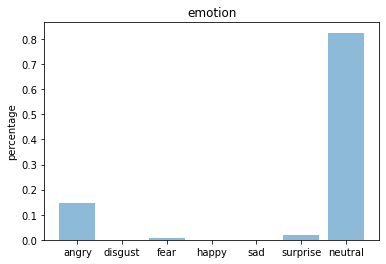

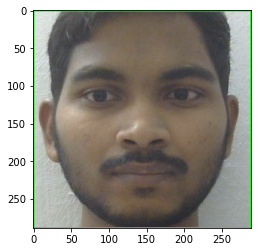


------------------------------------------------------------------

Playlists Generated By Using The Emotion : neutral

------------------------------------------------------------------

playlist_name : Neutral playlist
playlist_href : https://api.spotify.com/v1/playlists/6HmCUFtjSTocAqBp1e3pC6
playlist_spotify_link : https://open.spotify.com/playlist/6HmCUFtjSTocAqBp1e3pC6
playlist_songs : 
1) Mr. Brightside
2) Mr. Blue Sky
3) Beautiful Day
4) She Will Be Loved - Radio Mix
5) Payphone
6) Maps
7) Some Nights
8) Don't Stop Me Now - Remastered 2011
9) Bohemian Rhapsody - Remastered 2011
10) I Want You Back
11) Hooked On A Feeling
12) Counting Stars
13) Lean On (feat. MØ)
14) Cold Water
15) Starboy
16) I Gotta Feeling
17) Hey Ya!
18) Levels
19) Pompeii
20) Sweater Weather
-----------------------------------------------
playlist_name : Gender Neutral Love Songs 
playlist_href : https://api.spotify.com/v1/playlists/1yQE8bhK3lDNy5ZOoTO3o4
playlist_spotify_link : https://open.spotify.com/pl

In [18]:
if __name__ == '__main__':
#Testing a file.
    facecrop('test.jpg')
    file = 'capture.jpg'
    true_image = image.load_img(file)
    img = image.load_img(file, grayscale=True, target_size=(48, 48))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    x /= 255
    custom = model.predict(x)
    final_Emotion=emotion_analysis(custom[0])
    x = np.array(x, 'float32')
    x = x.reshape([48, 48]);
    plt.gray()
    plt.imshow(true_image)
    plt.show()
    print('\n------------------------------------------------------------------\n')
    print('Playlists Generated By Using The Emotion : ' + final_Emotion)
    print('\n------------------------------------------------------------------\n')
    final_list = sp.songs_by_emotion(final_Emotion)
    sp.print_songs(final_list)

In [19]:
train_acc=model.evaluate_generator(train_generator)

<ipython-input-19-cb4108ad82f7>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  train_acc=model.evaluate_generator(train_generator)


In [20]:
test_acc=model.evaluate_generator(test_generator)

<ipython-input-20-3575114fde7c>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_acc=model.evaluate_generator(test_generator)


In [21]:
print(test_acc[1])

0.561437726020813


In [22]:
print(train_acc[1])

0.9690689444541931
